In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

smell_map = {
    'Fresh': 1,
    'Slightly Sour': 2,
    'Noticeably Sour': 3,
    'Sour/Spoiled': 4
}

smell_df = pd.read_excel("Data/data_log_from_smell_test.xlsx")
smell_df['Timestamp'] = pd.to_datetime(smell_df['Timestamp'], errors='coerce')

sensor_df = pd.read_csv("Data/temperature_log_from_sensor.csv")
sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'], errors='coerce')

smell_df['Ref_Smell_Score'] = smell_df['Refrigerated Milk Smell'].map(smell_map)
smell_df['Unref_Smell_Score'] = smell_df['Unrefrigerated Milk Smell'].map(smell_map)

ref_data = smell_df.dropna(subset=['Ref_Smell_Score', 'Temprature of Refrigerator (F)'])
unref_data_1 = smell_df.dropna(subset=['Unref_Smell_Score', 'Temprature of the Unrefrigerated Milk Room (F)'])
unref_data_2 = sensor_df.dropna(subset=['Temperature (°F)'])

spoil_date = pd.to_datetime('2024-12-03')

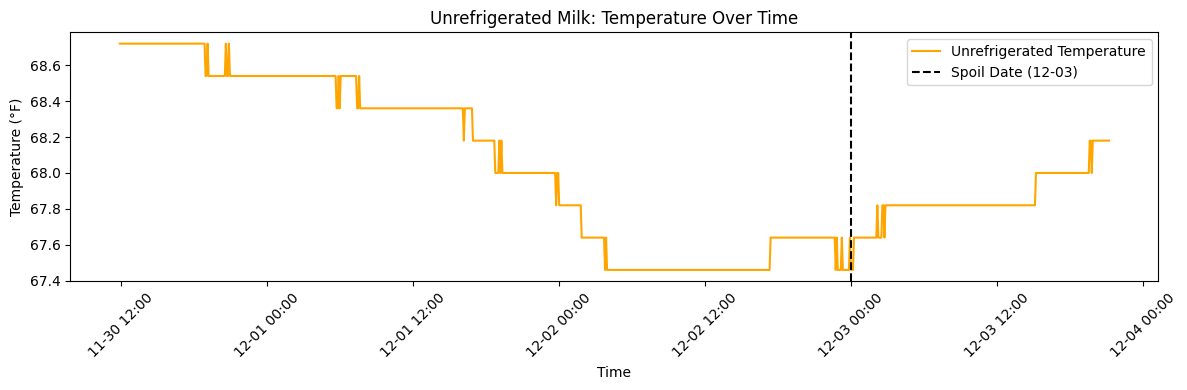

In [2]:
# 1. Temperature Over Time (Unrefrigerated)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(unref_data_2['Timestamp'], unref_data_2['Temperature (°F)'], 
        color='orange', label='Unrefrigerated Temperature')

ax.axvline(spoil_date, color='black', linestyle='--', label='Spoil Date (12-03)')

ax.set_title("Unrefrigerated Milk: Temperature Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (°F)")

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

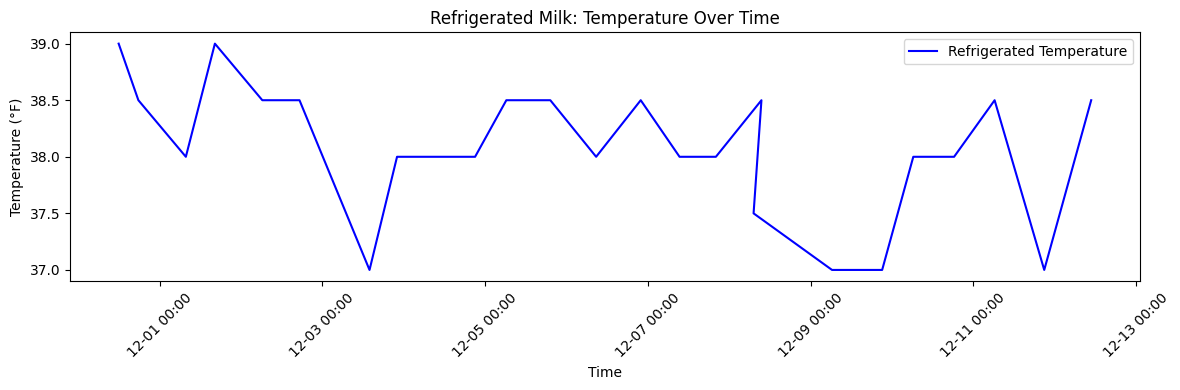

In [3]:
# 2. Temperature Over Time (Refrigerated)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot(ref_data['Timestamp'], ref_data['Temprature of Refrigerator (F)'], 
        color='blue', label='Refrigerated Temperature')

ax.set_title("Refrigerated Milk: Temperature Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Temperature (°F)")

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

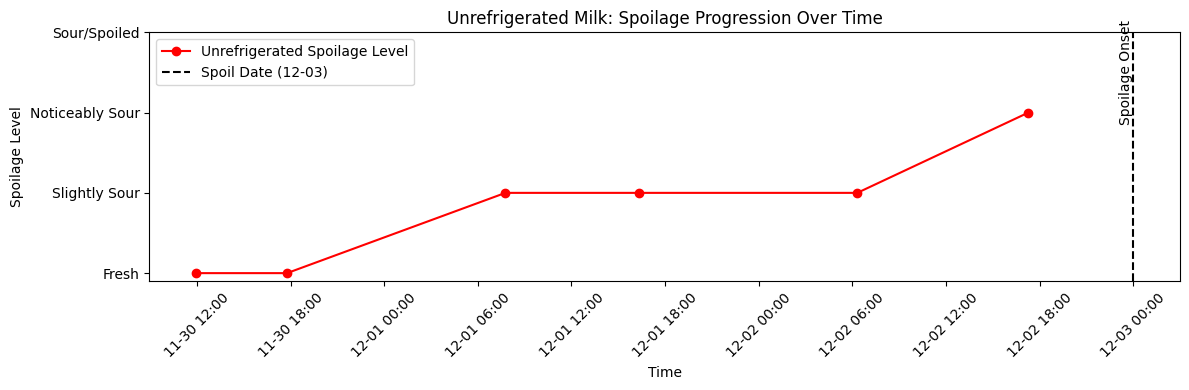

In [4]:
# 3. Spoilage Progression Over Time (Unrefrigerated)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(unref_data_1['Timestamp'], unref_data_1['Unref_Smell_Score'], 
        marker='o', color='red', label='Unrefrigerated Spoilage Level')

ax.axvline(spoil_date, color='black', linestyle='--', label='Spoil Date (12-03)')
ax.text(spoil_date, 3.5, 'Spoilage Onset', rotation=90, va='center', ha='right', color='black')

ax.set_title("Unrefrigerated Milk: Spoilage Progression Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Spoilage Level")
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(['Fresh','Slightly Sour','Noticeably Sour','Sour/Spoiled'])

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

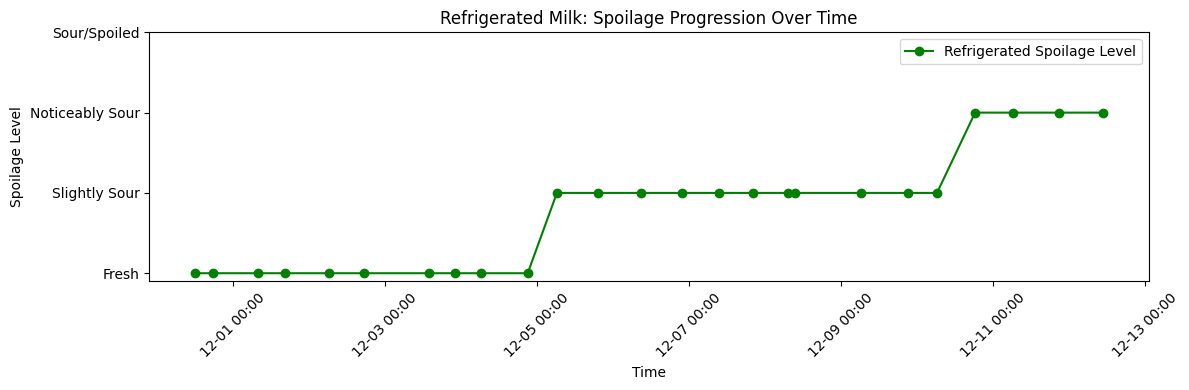

In [5]:
# 4. Spoilage Progression Over Time (Refrigerated)
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(ref_data['Timestamp'], ref_data['Ref_Smell_Score'], 
        marker='o', color='green', label='Refrigerated Spoilage Level')

ax.set_title("Refrigerated Milk: Spoilage Progression Over Time")
ax.set_xlabel("Time")
ax.set_ylabel("Spoilage Level")
ax.set_yticks([1,2,3,4])
ax.set_yticklabels(['Fresh','Slightly Sour','Noticeably Sour','Sour/Spoiled'])

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

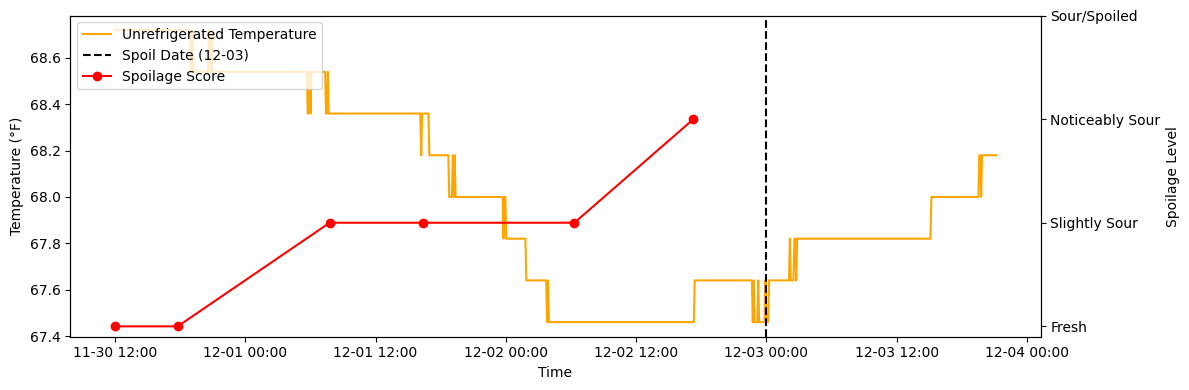

In [6]:
smell_df = pd.read_excel("Data/data_log_from_smell_test.xlsx")
smell_df['Timestamp'] = pd.to_datetime(smell_df['Timestamp'], errors='coerce')

sensor_df = pd.read_csv("Data/temperature_log_from_sensor.csv")
sensor_df['Timestamp'] = pd.to_datetime(sensor_df['Timestamp'], errors='coerce')

smell_df['Ref_Smell_Score'] = smell_df['Refrigerated Milk Smell'].map(smell_map)
smell_df['Unref_Smell_Score'] = smell_df['Unrefrigerated Milk Smell'].map(smell_map)

unref_smell_data = smell_df.dropna(subset=['Unref_Smell_Score'])
unref_temp_data = sensor_df.dropna(subset=['Temperature (°F)'])

spoil_date = pd.to_datetime('2024-12-03')

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(unref_temp_data['Timestamp'], unref_temp_data['Temperature (°F)'], 
        color='orange', label='Unrefrigerated Temperature')

ax.axvline(spoil_date, color='black', linestyle='--', label='Spoil Date (12-03)')

ax2 = ax.twinx()
ax2.plot(unref_smell_data['Timestamp'], unref_smell_data['Unref_Smell_Score'],
         marker='o', linestyle='-', color='red', label='Spoilage Score')

ax.set_xlabel("Time")
ax.set_ylabel("Temperature (°F)")

ax2.set_ylabel("Spoilage Level")

ax2.set_yticks([1,2,3,4])
ax2.set_yticklabels(['Fresh','Slightly Sour','Noticeably Sour','Sour/Spoiled'])

ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))
plt.xticks(rotation=45)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

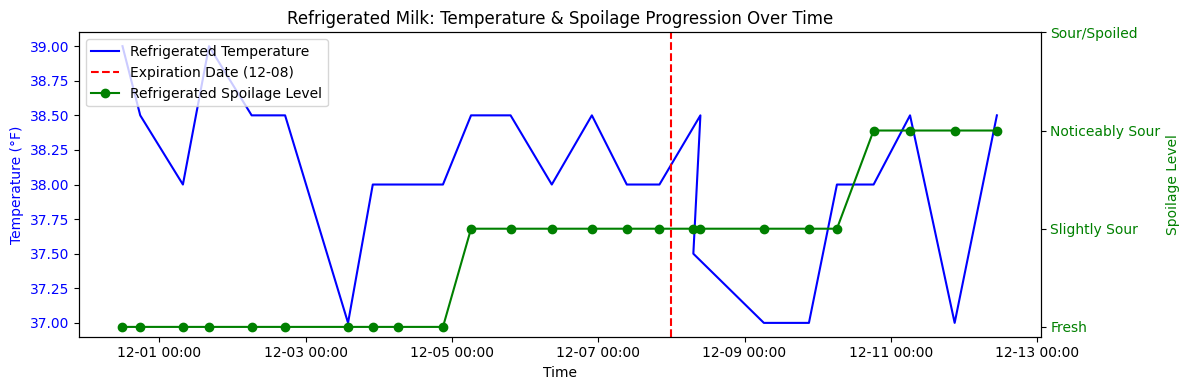

In [15]:
ref_expire_date = pd.to_datetime('2024-12-08')

fig, ax = plt.subplots(figsize=(12,4))

ax.plot(ref_data['Timestamp'], ref_data['Temprature of Refrigerator (F)'], 
        color='blue', label='Refrigerated Temperature')

ax.set_xlabel("Time")
ax.set_ylabel("Temperature (°F)", color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:%M'))

ax.axvline(ref_expire_date, color='red', linestyle='--', label='Expiration Date (12-08)')

ax2 = ax.twinx()
ax2.plot(ref_data['Timestamp'], ref_data['Ref_Smell_Score'],
         marker='o', color='green', label='Refrigerated Spoilage Level')

ax2.set_ylabel("Spoilage Level", color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.set_yticks([1,2,3,4])
ax2.set_yticklabels(['Fresh','Slightly Sour','Noticeably Sour','Sour/Spoiled'])

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

ax.set_title("Refrigerated Milk: Temperature & Spoilage Progression Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
